In [70]:
# Imports

# Gets rid of future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Python and ML Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import plotly.express as px 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [71]:
# Preprocessing Input data
#data = pd.read_csv('data/covid_data.csv', low_memory = False)
data = pd.read_csv('/Users/yingjiezhong/Downloads/AI_Project1-main-Project2(COVID)/Project2(COVID)/covid_data.csv', low_memory = False)

In [72]:
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [73]:
data.shape

(238234, 67)

In [74]:
# Preprocessing Input data, pick a specific date and drop NaS in variables that we are interested in
test_df = data.loc[data['date'] == '2022-10-31']
test_df = test_df.dropna(subset=['total_cases','total_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'population_density', 'gdp_per_capita', 'diabetes_prevalence', 'cardiovasc_death_rate', "life_expectancy", "aged_65_older"])
test_df.shape

(179, 67)

In [75]:
test_df.head(50)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
980,AFG,Asia,Afghanistan,2022-10-31,203063.0,97.0,123.429,7822.0,1.0,0.571,...,NaN,37.746,0.500,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
3006,ALB,Europe,Albania,2022-10-31,332966.0,0.0,27.143,3593.0,0.0,0.143,...,51.2,NaN,2.890,78.57,0.795,2.842318e+06,NaN,NaN,NaN,NaN
4013,DZA,Africa,Algeria,2022-10-31,270838.0,2.0,7.143,6881.0,0.0,0.000,...,30.4,83.741,1.900,76.88,0.748,4.490323e+07,NaN,NaN,NaN,NaN
5997,AGO,Africa,Angola,2022-10-31,103131.0,0.0,0.000,1917.0,0.0,0.000,...,NaN,26.664,NaN,61.15,0.581,3.558900e+07,NaN,NaN,NaN,NaN
7962,ATG,North America,Antigua and Barbuda,2022-10-31,9106.0,0.0,0.000,146.0,0.0,0.000,...,NaN,NaN,3.800,77.02,0.778,9.377200e+04,NaN,NaN,NaN,NaN
9024,ARG,South America,Argentina,2022-10-31,9718875.0,0.0,189.857,129991.0,0.0,1.714,...,27.7,NaN,5.000,76.67,0.845,4.551032e+07,NaN,NaN,NaN,NaN
10053,ARM,Asia,Armenia,2022-10-31,445242.0,142.0,20.286,8709.0,3.0,0.429,...,52.1,94.043,4.200,75.09,0.776,2.780472e+06,NaN,NaN,NaN,NaN
13121,AUS,Oceania,Australia,2022-10-31,10379442.0,1654.0,4883.714,15665.0,5.0,12.143,...,16.5,NaN,3.840,83.44,0.944,2.617741e+07,NaN,NaN,NaN,NaN
14128,AUT,Europe,Austria,2022-10-31,5439567.0,2846.0,5343.571,20981.0,2.0,11.714,...,30.9,NaN,7.370,81.54,0.922,8.939617e+06,NaN,NaN,NaN,NaN
15130,AZE,Asia,Azerbaijan,2022-10-31,823258.0,11.0,42.714,9944.0,0.0,1.000,...,42.5,83.241,4.700,73.00,0.756,1.035808e+07,NaN,NaN,NaN,NaN


# Visualization

In [76]:
fig = px.scatter(test_df, x="gdp_per_capita", y="total_deaths_per_million")
fig.show()

In [77]:
fig = px.scatter(test_df, x="gdp_per_capita", y="people_vaccinated_per_hundred")
fig.show()

In [78]:
fig = px.scatter(test_df, x="gdp_per_capita", y="cardiovasc_death_rate")
fig.show()

In [79]:
fig = px.scatter(test_df, x="gdp_per_capita", y="diabetes_prevalence")
fig.show()

In [80]:
fig = px.scatter(test_df, x="cardiovasc_death_rate", y="total_deaths_per_million")
fig.show()

In [81]:
fig = px.scatter(test_df, x="aged_65_older", y="total_deaths_per_million")
fig.show()

# K-Means Clustering

In [82]:
Z = test_df[["aged_65_older", "total_deaths_per_million", "cardiovasc_death_rate"]]
Z.head()

,aged_65_older,total_deaths_per_million,cardiovasc_death_rate
980,2.581,190.183,597.029
3006,13.188,1264.109,304.195
4013,6.211,153.241,278.364
5997,2.405,53.865,276.045
7962,6.933,1556.968,191.511


In [83]:
distortions = []
K = range(1,10)

for k in K:
    kmean = KMeans(n_clusters=k).fit(Z)
    
    distortions.append(sum(np.min(cdist(Z, kmean.cluster_centers_,'euclidean'), axis=1)) / Z.shape[0])

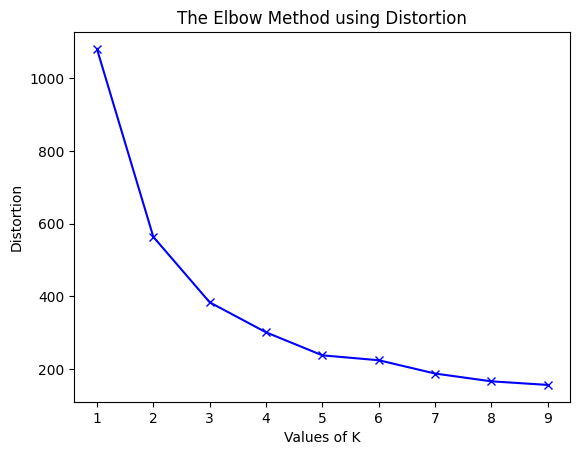

In [84]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Z)
z_train = scaler.transform(Z)

In [86]:
kmeans5 = KMeans(n_clusters=5).fit(z_train)
kmeans5.score(z_train)

-5.039410748124941

In [87]:
fig = px.scatter(Z, x="aged_65_older", y="total_deaths_per_million", color = kmeans5.labels_)
fig.show()

In [88]:
fig = px.scatter(Z, x="cardiovasc_death_rate", y="total_deaths_per_million", color = kmeans5.labels_)
fig.show()

In [89]:
kmeans5.cluster_centers_

array([[0.27448596, 0.28031819, 0.18621589],
       [0.6485705 , 0.28186508, 0.08366571],
       [0.57029102, 0.62873923, 0.42109068],
       [0.14085083, 0.05529645, 0.59181803],
       [0.10203061, 0.04599611, 0.273595  ]])

In [90]:
# axes = plt.axes(projection='3d')
# axes.scatter3D(Z["aged_65_older"], Z["total_deaths_per_million"], Z["cardiovasc_death_rate"], c=kmeans5.labels_)

# axes.set_xlabel("aged_65_older")
# axes.set_ylabel("total_deaths_per_million")
# axes.set_zlabel("cardiovasc_death_rate")

fig = px.scatter_3d(Z, x='aged_65_older', y='total_deaths_per_million', z='cardiovasc_death_rate',
              color=kmeans5.labels_)
fig.show()